In [1]:
# Import packages
import netCDF4 as nc
import numpy as np
import seawater as sw
import matplotlib.pyplot as plt

#Import files from computer

file1 = 'C:/Users/kudou/Documents/PostBack_Work/Code/Data/leatherman_all/leathermanNavy_3d_nosink/release_2018.05.01.nc'
file2 = 'C:/Users/kudou/Documents/PostBack_Work/Code/Data/leatherman_all/leathermanNavy_3d_sink40_sink/release_2018.05.01.nc'

In [2]:
# Read netCDF4 files for sticking
ns, s = nc.Dataset(file1), nc.Dataset(file2)

# Find travel times
ns_ts, s_ts = ns['ot'][:].data, s['ot'][:].data
ns_td, s_td = (ns_ts - ns_ts[0])/86400, (s_ts - s_ts[0])/86400

# Convert lat/lon maked arrays to data files 
ns_lat, ns_lon = ns["lat"][:].data, ns["lon"][:].data
s_lat, s_lon = s["lat"][:].data, s["lon"][:].data

NT, NP = ns_lon.shape
print(NT, NP)

dist = np.zeros((NT, NP))

for p in range(NP):
    dist[1:,p], junk = sw.dist(ns_lat[:,p], ns_lon[:,p])

ns_cdist = np.cumsum(dist, axis=0)

for p in range(NP):
    dist[1:,p], junk = sw.dist(s_lat[:,p], s_lon[:,p])

s_cdist = np.cumsum(dist, axis=0)

cs = ns['cs'][:].data
stuck = cs <= -.99
not_stuck = ~stuck
ns_istuck = np.argmin(not_stuck, axis = 0)

cs = s['cs'][:].data
stuck = cs <= -.99
not_stuck = ~stuck
s_istuck = np.argmin(not_stuck, axis = 0)

ns_cdist_alt = ns_cdist.copy()
for p in range(NP):
    ns_cdist_alt[ns_istuck[p]:,p] = np.nan

s_cdist_alt = s_cdist.copy()
for p in range(NP):
    s_cdist_alt[s_istuck[p]:,p] = np.nan

721 1000


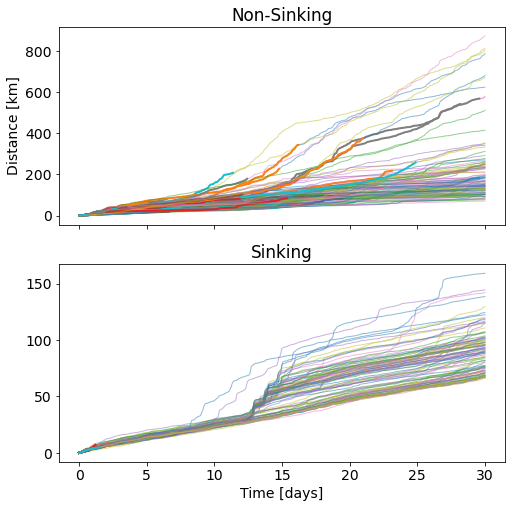

In [3]:
plt.close('all')
fs = 14
plt.rc('font', size=fs)
fig, axs = plt.subplots(2, figsize = (8,8), sharex=True)

# fig.suptitle('Sinking vs Non-Sinking Distance Traveled')
for p in range(100):
    axs[0].plot(ns_td,ns_cdist[:,p], lw = 1, alpha = .5) # full path
    axs[0].plot(ns_td,ns_cdist_alt[:,p], lw = 2) # ends when it gets stuck
axs[0].set_title('Non-Sinking')
axs[0].set_ylabel('Distance [km]')
for p in range(100):
    axs[1].plot(s_td,s_cdist[:,p], lw = 1, alpha = .5) # full path
    axs[1].plot(s_td,s_cdist_alt[:,p], lw = 2) # ends when it gets stuck
axs[1].set_title('Sinking')
axs[0].set_ylabel('Distance [km]')
plt.xlabel('Time [days]')

plt.show()
plt.rcdefaults()

In [24]:
#Create column names
#cols = ["No Sinking", "Sinking"]
# Convert summmed distance to pandas dataframe and get rid of brackets
#distance = pd.DataFrame(list(zip(ns_sum_dist.flatten(), s_sum_dist.flatten())))
# Save data to csv in Data/ folder with following naming scheme:
## MonthYearLocation_dist.csv
### Month = 3 letter acronymn, ex. January = Jan
### Year = last two digits unless pre-2000, ex. 2018 = 18
### Location = shortened name, ex. Puget Sound Naval Shipyard = Navy
#distance.to_csv("Data/May18Navy_dist.csv", header = cols)